##### 【 의사결정나무 알고리즘 - DT + CV 】
- iris(붓꽃) 품종 분류 모델
- 학습종류 : 지도학습 - 분류
- 학습방법 : DT기반 분류

[1] 모듈 로딩 및 데이터 준비 <hr>
- [1-1] 모듈 로딩
- [1-2] 데이터 준비

In [2]:
## ======================================================
## 모듈 불러오기
## ======================================================
import pandas as pd
import numpy as np

## ML학습 관련
from sklearn.tree import DecisionTreeClassifier

## ML 데이터셋 및 전처리 관련
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder

## ML 성능지표 관련
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report

## 시각화 관련
import matplotlib.pyplot as plt
import graphviz

In [3]:
DATA_FILE = '../Data/iris.csv'

irisDF = pd.read_csv(DATA_FILE)
irisDF.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


[2] 학습 준비<hr>
- [2-1] 피쳐/타겟 분리
- [2-2] 학습용/테스트용 분리
- [2-3] 수치형 피쳐 스케일링

In [4]:
featureDF = irisDF[irisDF.columns[:-1]]
targetSR  = irisDF[irisDF.columns[-1]]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state=42, stratify=targetSR)

In [6]:
scaler = RobustScaler()
scaler.fit(x_train)

rb_x_train = scaler.transform(x_train)
rb_x_test  = scaler.transform(x_test)

In [7]:
## ================================================
## 범주형 타겟 전처리 => 인코딩
## ================================================
lbEncoder  = LabelEncoder()
en_y_train = lbEncoder.fit_transform(y_train)
en_y_test  = lbEncoder.transform(y_test)

print(f'[en_y_train] en_y_train:{en_y_train.shape}\n{type(en_y_train)}\n{en_y_train[:3]} ')

[en_y_train] en_y_train:(120,)
<class 'numpy.ndarray'>
[0 2 1] 


[3] 학습 진행

In [8]:
## 모델 인스턴스 생성
treeModel = DecisionTreeClassifier(random_state=42)

## 학습 진행 : 학습용 데이터 셋
treeModel.fit(rb_x_train, en_y_train)
#treeModel.fit(x_train, en_y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
## 모델 파라미터 확인   :   .fit()학습 후 세팅되는 파라미터들 즉, 데이터셋과 관련된 것들
##                       모델 파라미터 확인 => 파라미터이름_
print(f' ===[모델 파라미터들]=== ')
print(f'classes_                : {treeModel.classes_}')
print(f'n_classes_              : {treeModel.n_classes_}')
print(f'n_features_in_          : {treeModel.n_features_in_}')

## => 데이터셋에서 타겟관련 중요피쳐 찾기에 적합한 모델 파라미터
print(f'feature_names_in_       : {treeModel.feature_importances_}')

 ===[모델 파라미터들]=== 
classes_                : [0 1 2]
n_classes_              : 3
n_features_in_          : 4
feature_names_in_       : [0.00625    0.02916667 0.5585683  0.40601504]


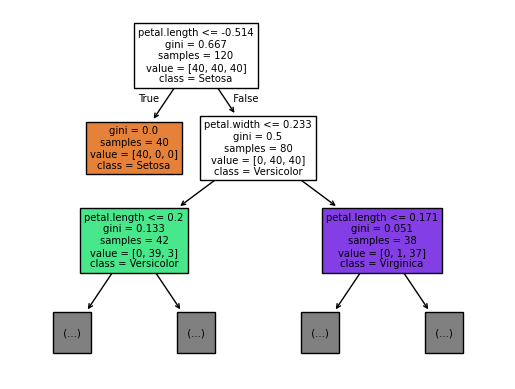

In [10]:
## ==================================================
## 학습 완료 후 모델 시각화
## ==================================================
from sklearn import tree

tree.plot_tree(treeModel,
               feature_names=irisDF.columns[:-1],
               class_names=lbEncoder.classes_.tolist(),
               label='all',
               max_depth=2,
               filled=True)
plt.show()

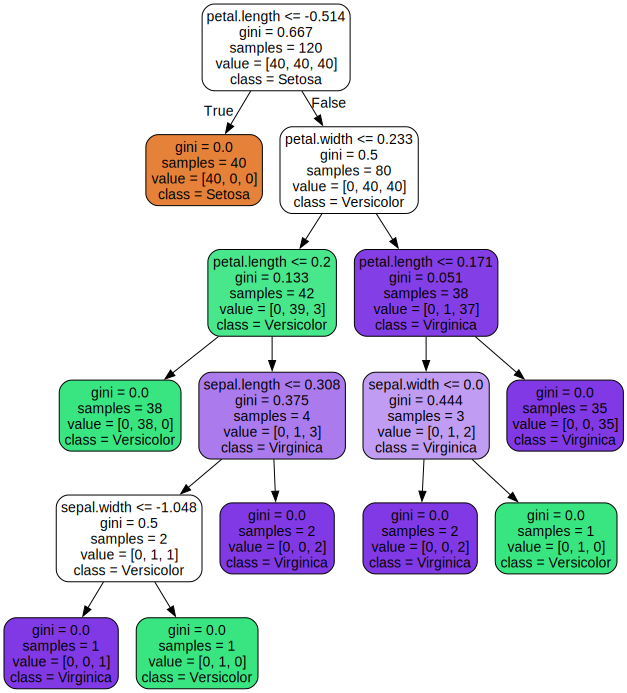

In [11]:
## ==================================================
## 학습 완료 후 모델 시각화 => by Graphviz
## ==================================================
from sklearn.tree import export_graphviz

## 트리 모델 구조 dot 포맷 파일로 저장
export_graphviz(treeModel,
                out_file='./iris_tree.dot',
                feature_names=irisDF.columns[:-1].to_list(),
                class_names=lbEncoder.classes_.tolist(),
                filled=True,
                rounded=True)


## dot 포맷 파일 해석 및 시각화
with open('./iris_tree.dot') as f:
    dot_ = f.read()

graphviz.Source(dot_)

In [12]:
## ==================================================
## 학습 완료 후 트리 모델 구조 텍스트
## ==================================================
## 트리 구조 설명
tree_text = tree.export_text(treeModel,
                             feature_names=irisDF.columns[:-1],
                             class_names = lbEncoder.classes_.tolist(),
                             show_weights=True)

print(tree_text)

|--- petal.length <= -0.51
|   |--- weights: [40.00, 0.00, 0.00] class: Setosa
|--- petal.length >  -0.51
|   |--- petal.width <= 0.23
|   |   |--- petal.length <= 0.20
|   |   |   |--- weights: [0.00, 38.00, 0.00] class: Versicolor
|   |   |--- petal.length >  0.20
|   |   |   |--- sepal.length <= 0.31
|   |   |   |   |--- sepal.width <= -1.05
|   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: Virginica
|   |   |   |   |--- sepal.width >  -1.05
|   |   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: Versicolor
|   |   |   |--- sepal.length >  0.31
|   |   |   |   |--- weights: [0.00, 0.00, 2.00] class: Virginica
|   |--- petal.width >  0.23
|   |   |--- petal.length <= 0.17
|   |   |   |--- sepal.width <= 0.00
|   |   |   |   |--- weights: [0.00, 0.00, 2.00] class: Virginica
|   |   |   |--- sepal.width >  0.00
|   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: Versicolor
|   |   |--- petal.length >  0.17
|   |   |   |--- weights: [0.00, 0.00, 35.00] class: Virginica

[4] 학습평가 <hr>
- 평가지표 결정 
    * 데이터셋의 균형/불균형 => 평균 계산 방식 : 균형(micro), 불균형(macro, weighted)
    * 평가지표 종류 => accuracy, precision, recall, f1-score

In [13]:
## ===============================================================
## [4-1] 스케일링 적용된 경우 성능평가
## ===============================================================
## => 테스트 데이터에 대한 예측값 추출
pre_y = treeModel.predict(rb_x_test)

## => 성능평가 : 함수들(1D_정답타겟, 1D_예측)
accu_ = accuracy_score(en_y_test, pre_y)

## => 다중클래스분류(Multi-class)경우 평균 계산방식 지정
prec_= precision_score(en_y_test, pre_y, average='micro')
reca_= recall_score(en_y_test, pre_y, average='micro')
f1sc_= f1_score(en_y_test, pre_y, average='micro')

print(f'=== [스케일링데이터+모델 성능평가] ===')
print(f'accuracy   : {accu_}')
print(f'precision  : {prec_}')
print(f'recall     : {reca_}')
print(f'f1-score   : {f1sc_}')

## => 분류 결과 보고서
reports = classification_report(en_y_test,
                                pre_y,
                                target_names=lbEncoder.classes_.tolist())
print(reports)

=== [스케일링데이터+모델 성능평가] ===
accuracy   : 0.9333333333333333
precision  : 0.9333333333333333
recall     : 0.9333333333333333
f1-score   : 0.9333333333333333
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.90      0.90      0.90        10
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [14]:
lbEncoder.classes_

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)